In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib widget

In [5]:
import pandas as pd
import os
from pathlib import Path

os.chdir('/home/bohdan/studies/sem8/io')


In [6]:
csv_path = Path('medium.csv')
problem = pd.read_csv(csv_path)
problem.head()


,cust,x,y,demand,from,to,service
0,1,40.0,50.0,0.0,0.0,1236.0,0.0
1,2,45.0,68.0,10.0,912.0,967.0,90.0
2,3,45.0,70.0,30.0,825.0,870.0,90.0
3,4,42.0,66.0,10.0,65.0,146.0,90.0
4,5,42.0,68.0,10.0,727.0,782.0,90.0


1. Uruchomić
 - dostosowanie do naszych danych
 
2. Dodać modyfikacje
- dodajemy do mrówki wiedzę o depocie oraz o pojemności
- mrówka po osiągnięciu maks pojemności wraca do początku



In [36]:
from swarmlib_.aco4tsp.aco_algorithm import ACOAlgorithm


solver = ACOAlgorithm(csv_path, ant_number=1, iteration_number=100, vehicle_capacity=50)
best_plan, _ = solver.solve()

[increase_demand] [Node(name=23, demand=20.0, service=90.0, from_=812.0, to=883.0, coord=(28.0, 52.0), is_depot=False)] -> [Node(name=23, demand=25, service=90.0, from_=812.0, to=883.0, coord=(28.0, 52.0), is_depot=False)]
Updated shortest_distance="1022.5084759063536" and best_path="[1, 6, 30, 29, 1, 25, 24, 7, 11, 1, 33, 19, 1, 4, 12, 9, 27, 1, 31, 15, 28, 18, 1, 22, 23, 1, 5, 13, 32, 1, 26, 1, 3, 1, 17, 21, 1, 20, 16, 1, 2, 34, 1, 8, 10, 1, 14, 1]"
[remove_node] [Node(name=4, demand=10.0, service=90.0, from_=65.0, to=146.0, coord=(42.0, 66.0), is_depot=False)] -> [None]
Updated shortest_distance="973.2809891903705" and best_path="[1, 1, 22, 23, 1, 31, 15, 28, 18, 1, 26, 27, 1, 12, 9, 1, 19, 33, 1, 2, 34, 1, 25, 24, 7, 11, 1, 32, 13, 5, 1, 14, 10, 1, 29, 30, 6, 1, 17, 21, 1, 8, 3, 1, 16, 20, 1]"
[increase_demand] [Node(name=1, demand=0.0, service=0.0, from_=0.0, to=1236.0, coord=(40.0, 50.0), is_depot=True)] -> [Node(name=1, demand=9, service=0.0, from_=0.0, to=1236.0, coord=(40.0, 5

/home/bohdan/Soft/conda/envs/lux_ai/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


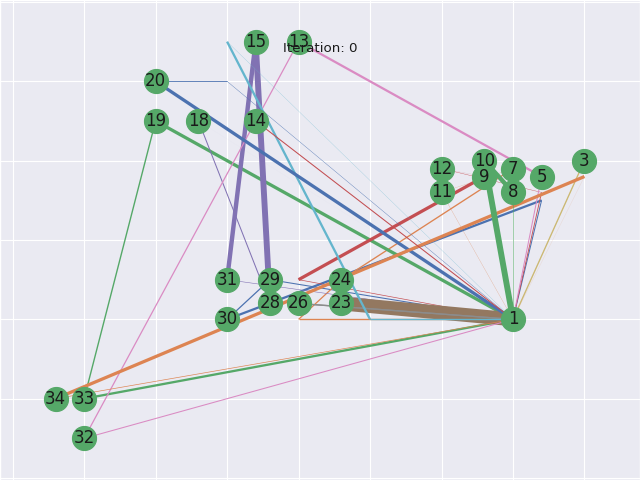

In [37]:
# TODO: Maybe fix in very far perspective

# import seaborn as sns
# sns.set_theme('paper')
# solver.replay()

/home/bohdan/Soft/conda/envs/lux_ai/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


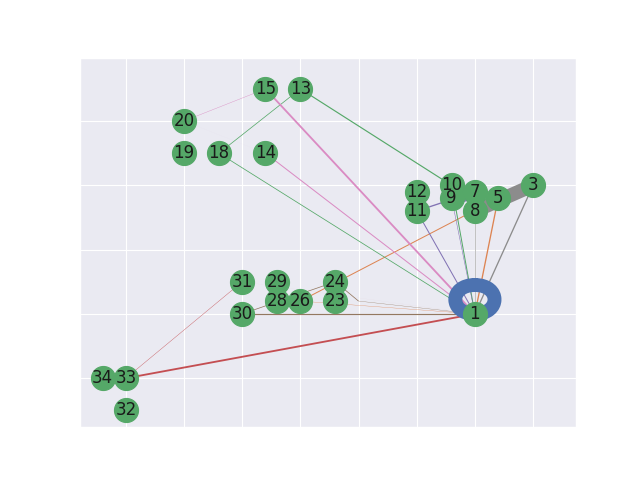

In [38]:
solver.plot_result()

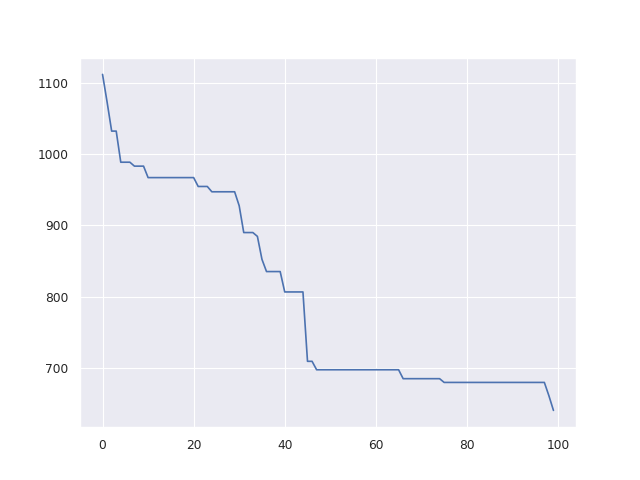

In [34]:
solver.plot_fitness()

# TODO

[ ] Poprawić wykresy funkcji kosztu:

* Powinien zawierać dwie wartości: 
    - aktualny koszt
    - najlepszy do tej pory znaleziony koszt

* Powinien mieć podpisane osie 



[ ] Zrozumienie (razem) i zaimplementowanie trzech metryk diversity tablice feromonów o których Byrski mówi w swoim artykule https://journals.agh.edu.pl/csci/article/view/4301


[ ] Przeszkuanie artykułów dot. mrówek do dynamicznego VRP


----------------------------------
- Jak pokazać, że coś się adaptuje?
- Funkcja kosztu jest czymś innym niż funkcja adaptacji 



-----

[ ] Dodajemy commitment (każdy pojazd będzie miał swoją prędkość per iterację)

[ ] Trasa do przejechania (po komitmencie) jest funkcją kosztu






